# Sistemas Inteligentes 2021/2022

## Mini-projeto 2: Quadrados Latinos


## Grupo: 42

### Elementos do Grupo

Número:  53687       Nome:   Ariana Dias  
Número:  51127       Nome:   Luís Ferreirinha


_o 3º colega não participou em nada_

(Nota: Neste relatório pode adicionar as células de texto e código que achar necessárias.)

## Representação de variáveis, domínios, vizinhos e restrições

O problema dos quadrados latinos pode ser representado como uma matriz $n \times n$ em que cada linha e coluna contêm exatmente um número de $1$ a $n$.  

Então para caracterizar este CSP em python obtamos pelas seguintes escolhas:  

- Variáveis:  
  
    Cada variável no nosso problema vai representar o valor atribuiado a um elemento da matriz.  
    Então em python representamos o conjunto das variáveis como uma lista das coordenadas de cada
    elemento na matriz:    
    -  var $=[(i_1,j_1),...,(i_n,j_n)]$  
<br>
- Domínios:  
  
    Neste problema cada variável pode tomar um valor de $1,...,n$, exceto de houver condições iniciais.
    Portanto em python decidimos utilizar um dicionário, onde as chaves são as variáveis e estas correspondem a uma lista de inteiros contento os valores possíveis para aquela variável:
    
    - dominio $=\{(i_1,j_1) = [1,..,n], ...\}$  
<br> 
- Vizinhos:  

    Uma variável vai ser vizinha de outra de estiver na mesma linha ou coluna que essa variável.
    Em python definimos os vizinhos como um dicionário onde cada variável é uma chave e corresponde a uma lista de variáveis que são suas vizinhas:  
    
    - vizinhos $=\{(i_k,i_m) : [(i_1,j_m),...,(i_n,j_m),(i_k,j_1),...,(i_k,j_n)], \, ...  \, \}$  
<br>
- Restrições:  

    A restrição principal deste problema é a impossibilidade de haver repetições de um número
    ao longo de uma coluna ou linha, ou seja tem de ser diferente de todos os seus vizinhos.
    Em python esta restrição é representada pela comparação dos valores de duas variáveis vizinhas:  

    -  ```python
       valor_variavel_1 != valor_variavel_2
       ```
    <br>
    Como também temos a variação do Futoshiki, temos de definir outras restrições para esse problema.  

    A ideia principal é que duas variáveis adjacentes podem agora ter a restrição adicional de o valor de uma ser maior ou menor que o valor da outra. Então para representar o mapeamento destas novas restrições usamos um dicionário onde as chaves são um tuplos contendos as duas variáveis em questão e vão corresponde a uma função que verifica se os valores destas são menores ou maiores conforme a restrição.

    - desigualdades $=\{((i_k,j_m),(i_k,j_{m+1})) : maior\, \, \text{ou} \, \, menor \}$  

    Cada uma destas funções vair comparar os valores das variavéis conforme o seu nome.  

    - ```python 
      def maior(a,b): return a > b
      ```

    - ```python 
      def menor(a,b): return a < b
      ```


 

## Formulação do problema

- Quadrados Latinos

In [86]:
from csp import *

def quadrado_latino(n=3, initial={}) -> CSP:
    """Gera um CSP para o problema dos quadrados latinos

    Args:
        n (int, optional): Dimensao da matriz do problema. Defaults to 3.
        initial (dict, optional): Valores iniciais para cada um dos elementos da matriz. Defaults to {}.

    Returns:
        CSP: Objeto CSP para o problema dos quadrados latinos
    """    
    
    # definicao das variaveis, as coordenadas x,y vão de 0 a n-1
    variaveis = [(i,j) for i in range(0,n) for j in range(0,n)]

    # Valores possiveis para as variaveis dada a dimensao n do problema
    conjunto = [i for i in range(1,n+1)]
    
    # Iniciamos os dominios com os valores iniciais dados para as variaveis
    dominios = initial

    # Diferenca dos dois conjuntos vai resultar nas variaveis nao preenchidas
    for item in set(variaveis - initial.keys()):
        dominios[item] = conjunto
    
    # Condicao que determina de duas variaveis sao vizinhas, verifica se tem alguma das coordendas x ou y iguais
    condicao_vizinhanca = lambda x,y : (x[0] == y[0] and x[1] != y[1]) or (x[0] != y[0] and x[1] == y[1])

    # Para cada variavel vamos atribuir uma lista resultante de filtrar a lista de todas as variaveis
    # com a condicao de que as variaveis sejam vizinhas da variavel chave
    vizinhos = {var : list(filter(lambda x: condicao_vizinhanca(x,var), variaveis)) for var in variaveis}

    def restricoes(X, a, Y, b):
        # Verifica-se se duas variaveis sao vizinhas antes de verficar que tem valores diferentes entre si
        if Y in vizinhos[X]:
            return a != b
        return True
        
    return CSP(variaveis, dominios, vizinhos, restricoes)

- Futoshiki

In [87]:
# Funcoes restricao
def maior(x,y):
    return x > y

def menor(x,y):
    return x < y

def futoshiki(n=3, initial={}, desigualdades={}):
    """Gera um CSP para o problema do futoshiki

    Args:
        n (int, optional): Dimensao da matriz do problema. Defaults to 3.
        initial (dict, optional): Valores iniciais para cada um dos elementos da matriz. Defaults to {}.
        desigualdades (dict, optional): Restrições adicionais do problema futoshiki. Defaults to {}.

    Returns:
        CSP: Objeto CSP para o problema dos quadrados latinos
    """    
    
    # definicao das variaveis, as coordenadas x,y vão de 0 a n-1
    variaveis = [(i,j) for i in range(0,n) for j in range(0,n)]

    # Valores possiveis para as variaveis dada a dimensao n do problema
    conjunto = [i for i in range(1,n+1)]
    
    # Iniciamos os dominios com os valores iniciais dados para as variaveis
    dominios = initial

    # Diferenca dos dois conjuntos vai resultar nas variaveis nao preenchidas
    for item in set(variaveis - initial.keys()):
        dominios[item] = conjunto
    
    # Condicao que determina de duas variaveis sao vizinhas, verifica se tem alguma das coordendas x ou y iguais
    condicao_vizinhanca = lambda x,y : (x[0] == y[0] and x[1] != y[1]) or (x[0] != y[0] and x[1] == y[1])

    # Para cada variavel vamos atribuir uma lista resultante de filtrar a lista de todas as variaveis
    # com a condicao de que as variaveis sejam vizinhas da variavel chave
    vizinhos = {var : list(filter(lambda x: condicao_vizinhanca(x,var), variaveis)) for var in variaveis}

    restricoes_desigualdades = desigualdades.copy()
    for var, restricao in desigualdades.items():
        if restricao.__name__ == "maior":
            restricoes_desigualdades[(var[1],var[0])] = menor
        else:
            restricoes_desigualdades[(var[1],var[0])] = maior

    def restricoes(X, a, Y, b):
        # Vamos verificar se a var X tem alguma condição de desigualdade com outra var Y
        if (X,Y) in restricoes_desigualdades.keys():
            if not restricoes_desigualdades[(X,Y)](a,b):
                return False
        # Verifica se sao vizinhos
        if Y in vizinhos[X]:
            return  a != b
        return True

    return CSP(variaveis, dominios, vizinhos, restricoes)

## Criação do problema do quadrado latino simples

Mostrem que o código está a funcionar, construindo um problema de quadrado latino *4x4*, imprimindo as variáveis, domínios iniciais, e vizinhos. Adicione os comentários necessários. Mostre como podemos criar um puzzle com quadrados já preenchidos, e qual o impacto que isso tem nas variáveis, domínios iniciais, e vizinhos.

Para criar um problema quadrado latino 4x4 sem valores iniciais para as variáveis basta executar

In [88]:
q4 = quadrado_latino(4)

Tendo o problema definido, podemos agora ver as variáveis, domínios e os vizinhos deste problema

In [89]:
print(f"Variáveis = {q4.variables}\n")
print(f"Domínios = {q4.domains}\n")
print(f"Vizinhos = {q4.neighbors}\n")

Variáveis = [(0, 0), (0, 1), (0, 2), (0, 3), (1, 0), (1, 1), (1, 2), (1, 3), (2, 0), (2, 1), (2, 2), (2, 3), (3, 0), (3, 1), (3, 2), (3, 3)]

Domínios = {(0, 1): [1, 2, 3, 4], (1, 2): [1, 2, 3, 4], (2, 1): [1, 2, 3, 4], (3, 1): [1, 2, 3, 4], (0, 2): [1, 2, 3, 4], (2, 2): [1, 2, 3, 4], (1, 0): [1, 2, 3, 4], (3, 2): [1, 2, 3, 4], (1, 3): [1, 2, 3, 4], (0, 0): [1, 2, 3, 4], (1, 1): [1, 2, 3, 4], (0, 3): [1, 2, 3, 4], (2, 0): [1, 2, 3, 4], (3, 0): [1, 2, 3, 4], (2, 3): [1, 2, 3, 4], (3, 3): [1, 2, 3, 4]}

Vizinhos = {(0, 0): [(0, 1), (0, 2), (0, 3), (1, 0), (2, 0), (3, 0)], (0, 1): [(0, 0), (0, 2), (0, 3), (1, 1), (2, 1), (3, 1)], (0, 2): [(0, 0), (0, 1), (0, 3), (1, 2), (2, 2), (3, 2)], (0, 3): [(0, 0), (0, 1), (0, 2), (1, 3), (2, 3), (3, 3)], (1, 0): [(0, 0), (1, 1), (1, 2), (1, 3), (2, 0), (3, 0)], (1, 1): [(0, 1), (1, 0), (1, 2), (1, 3), (2, 1), (3, 1)], (1, 2): [(0, 2), (1, 0), (1, 1), (1, 3), (2, 2), (3, 2)], (1, 3): [(0, 3), (1, 0), (1, 1), (1, 2), (2, 3), (3, 3)], (2, 0): [(0, 0), 

Para criar-mos um problema com um quadrado semi-preenchido temos primeiro de definir quais os elementos da matriz que vão estar preenchidos e qual o seu valor. Para fazer-mos isso podemos definir um dicionário com essa informação da seguinte forma:

In [90]:
valores_preenchidos = {(0,0) : [1], (1,1) : [3], (2,2) : [2]}

Depois basta passar esse dicionário como segundo argumento à função quadrado_latino

In [91]:
q4_semi = quadrado_latino(n=4, initial=valores_preenchidos)

O facto de o quadrado ser semi preenchido apenas vai afetar os domínios iniciais, fazendo com que o dominio inicial das variáveis já com valores atribuidos seja reduzido esses valores.

In [92]:
print(f"Variáveis = {q4_semi.variables}\n")
print(f"Domínios = {q4_semi.domains}\n")
print(f"Vizinhos = {q4_semi.neighbors}\n")

Variáveis = [(0, 0), (0, 1), (0, 2), (0, 3), (1, 0), (1, 1), (1, 2), (1, 3), (2, 0), (2, 1), (2, 2), (2, 3), (3, 0), (3, 1), (3, 2), (3, 3)]

Domínios = {(0, 0): [1], (1, 1): [3], (2, 2): [2], (0, 1): [1, 2, 3, 4], (1, 2): [1, 2, 3, 4], (2, 1): [1, 2, 3, 4], (3, 1): [1, 2, 3, 4], (0, 3): [1, 2, 3, 4], (2, 0): [1, 2, 3, 4], (3, 0): [1, 2, 3, 4], (2, 3): [1, 2, 3, 4], (0, 2): [1, 2, 3, 4], (3, 3): [1, 2, 3, 4], (1, 0): [1, 2, 3, 4], (3, 2): [1, 2, 3, 4], (1, 3): [1, 2, 3, 4]}

Vizinhos = {(0, 0): [(0, 1), (0, 2), (0, 3), (1, 0), (2, 0), (3, 0)], (0, 1): [(0, 0), (0, 2), (0, 3), (1, 1), (2, 1), (3, 1)], (0, 2): [(0, 0), (0, 1), (0, 3), (1, 2), (2, 2), (3, 2)], (0, 3): [(0, 0), (0, 1), (0, 2), (1, 3), (2, 3), (3, 3)], (1, 0): [(0, 0), (1, 1), (1, 2), (1, 3), (2, 0), (3, 0)], (1, 1): [(0, 1), (1, 0), (1, 2), (1, 3), (2, 1), (3, 1)], (1, 2): [(0, 2), (1, 0), (1, 1), (1, 3), (2, 2), (3, 2)], (1, 3): [(0, 3), (1, 0), (1, 1), (1, 2), (2, 3), (3, 3)], (2, 0): [(0, 0), (1, 0), (2, 1), (2, 2), (2,

Resolva o problema com o backtracking sem inferencia, com inferencia, e com uma heurística.

Como a procura para um problema de dimensão baixa demora muito pouco tempo (ordem dos $1\times10^{-4}\, s$) Vamos definir uma função que executa uma pesquisa $n$ vezes (neste caso 50) e calcula a média dos tempos de execução da pesquisa. Desta forma podemos obter tempos de execução mais consistentes que não vão depender tanto de variações na velocidade do processador durante a execução das diferentes procuras.

In [93]:
import timeit
import math


def desvio_padrao(valores, N):
    avg = sum(valores) / N
    soma = 0
    for x in valores:
        soma += (x-avg)**2
    return math.sqrt(soma / N)

def avg_run_time(func, *args, **kwargs):
    """Corre uma função n vezes medindo o tempo de execução de cada vez
    e imprime a média dos tempos

    Args:
        func: Função a correr
    """
    n = 100000
    run_times = []
    for i in range(n):
        start = timeit.default_timer()
        func(*args, **kwargs)
        stop = timeit.default_timer()
        run_times.append(stop-start)
    return (sum(run_times) / n, desvio_padrao(run_times, n))

# Guardar os dados e solucoes para analisar mais tarde
tempos = {}
desvios = {}
solucoes = {}

- Dimensão do problema:

In [94]:
n = 4

- Backtracking sem inferência

In [95]:
# Definir problema
QuadradoLatinoSemInferência = quadrado_latino(n)
# Guardar solucao
sol_1 = backtracking_search(QuadradoLatinoSemInferência)
# Calcular tempo medio executando 20 vezes
tempo_medio1, desvio1 = avg_run_time(backtracking_search, QuadradoLatinoSemInferência)
# Guardar resultados
tempos['SemInferência'] = tempo_medio1
solucoes['SemInferência'] = sol_1
desvios['SemInferência'] = desvio1
# Imprimir resultados
print(f"Tempo médio de execução: {tempo_medio1:.6f} \u00b1 {desvio1:.6f} s")
print('Assignment (SemInferência) = ',sol_1)

Tempo médio de execução: 0.000170 ± 0.000054 s
Assignment (SemInferência) =  {(0, 0): 1, (0, 1): 2, (0, 2): 3, (0, 3): 4, (1, 0): 2, (1, 1): 1, (1, 2): 4, (1, 3): 3, (2, 0): 3, (2, 1): 4, (2, 2): 1, (2, 3): 2, (3, 0): 4, (3, 1): 3, (3, 2): 2, (3, 3): 1}


- Backtracking com inferência Foward-Checking

In [96]:
# Definir problema
QuadradoLatinoComInferência_FRWDchecking = quadrado_latino(n)
# Resolver e guardar solucao
sol_2 = backtracking_search(QuadradoLatinoComInferência_FRWDchecking, inference=forward_checking)
# Calcular o tempo medio de execucao
tempo_medio2, desvio2 = avg_run_time(backtracking_search, QuadradoLatinoComInferência_FRWDchecking, inference=forward_checking)
# Guardar resultados
tempos['FRWDchecking'] = tempo_medio2
solucoes['FRWDchecking'] = sol_2
desvios['FRWDchecking'] = desvio2
# Imprimir resultados
print(f"Tempo médio de execução: {tempo_medio2:.6f} \u00b1 {desvio2:.6f} s")
print('Assignment (FRWDchecking) = ',sol_2)

Tempo médio de execução: 0.000212 ± 0.000046 s
Assignment (FRWDchecking) =  {(0, 0): 1, (0, 1): 2, (0, 2): 3, (0, 3): 4, (1, 0): 2, (1, 1): 1, (1, 2): 4, (1, 3): 3, (2, 0): 3, (2, 1): 4, (2, 2): 1, (2, 3): 2, (3, 0): 4, (3, 1): 3, (3, 2): 2, (3, 3): 1}


- Backtracking com inferência MAC

In [97]:
# Definir problema
QuadradoLatinoComInferência_MAC = quadrado_latino(n)
# Resolver e guardar solucao
sol_4 = backtracking_search(QuadradoLatinoComInferência_MAC, inference=mac)
# Calcular tempo medio de execucao
tempo_medio4, desvio4 = avg_run_time(backtracking_search, QuadradoLatinoComInferência_MAC, inference=mac)
# Guarda resultados
tempos['MAC'] = tempo_medio4
solucoes['MAC'] = sol_4
desvios['MAC'] = desvio4
# Imprimir resultados
print(f"Tempo médio de execução: {tempo_medio4:.6f} \u00b1 {desvio4:.6f} s")
print('Assignment (MAC) = ', sol_4)

Tempo médio de execução: 0.000316 ± 0.000065 s
Assignment (MAC) =  {(0, 0): 1, (0, 1): 2, (0, 2): 3, (0, 3): 4, (1, 0): 2, (1, 1): 1, (1, 2): 4, (1, 3): 3, (2, 0): 3, (2, 1): 4, (2, 2): 1, (2, 3): 2, (3, 0): 4, (3, 1): 3, (3, 2): 2, (3, 3): 1}


- Backtracking com pré-processamento AC3

In [103]:
# Definir problema
QuadradoLatinoComAC3 = quadrado_latino(n)
# Aplicar pre-processamento
p_AC3 = AC3(QuadradoLatinoComAC3)
# Resolver e guardar solucao
sol_3 = backtracking_search(p_AC3)
# Calcular o tempo medio de execucao
tempo_medio3, desvio3 = avg_run_time(backtracking_search, p_AC3)
# Guarda resultados
tempos['AC3'] = tempo_medio3
solucoes['AC3'] = sol_3
desvios['AC3'] = desvio3
# Imprimir resultados
print(f"Tempo médio de execução: {tempo_medio3:.6f} \u00b1 {desvio3:.6f} s")
print('Assignment (QuadradoLatinoComAC3) = ', sol_3)

Tempo médio de execução: 0.000167 ± 0.000054 s
Assignment (QuadradoLatinoComAC3) =  {(0, 0): 1, (0, 1): 2, (0, 2): 3, (0, 3): 4, (1, 0): 2, (1, 1): 1, (1, 2): 4, (1, 3): 3, (2, 0): 3, (2, 1): 4, (2, 2): 1, (2, 3): 2, (3, 0): 4, (3, 1): 3, (3, 2): 2, (3, 3): 1}


- Backtracking com Heurística MRV

In [99]:
# Definir problema
QuadradoLatinoComHeuristica = quadrado_latino(n)
# Resolver e guardar
sol_6 = backtracking_search(QuadradoLatinoComHeuristica, select_unassigned_variable = mrv)
# Tempo medio
tempo_medio6, desvio6 = avg_run_time(backtracking_search, QuadradoLatinoComHeuristica, select_unassigned_variable = mrv)
# Guarda resultados
tempos['MRV'] = tempo_medio6
solucoes['MRV'] = sol_6
desvios['MRV'] = desvio6
# Imprimir resultados
print(f"Tempo médio de execução: {tempo_medio6:.6f} \u00b1 {desvio6:.6f} s")
print('Assignment (QuadradoLatinoComHeuristica) = ', sol_6)

Tempo médio de execução: 0.000320 ± 0.000076 s
Assignment (QuadradoLatinoComHeuristica) =  {(3, 2): 1, (0, 2): 2, (3, 0): 2, (2, 2): 3, (1, 0): 1, (3, 3): 3, (0, 1): 1, (1, 2): 4, (0, 0): 3, (1, 3): 2, (2, 1): 2, (2, 3): 1, (3, 1): 4, (1, 1): 3, (2, 0): 4, (0, 3): 4}


- Backtracking com Heurística MRV, Inferência foward_checking e pré-processamento AC3

In [100]:
# Definir problema
QuadradoLatinoHeuristicaInferenciaAC3 = quadrado_latino(n)
# Pre processamento
p_AC3 = AC3(QuadradoLatinoHeuristicaInferenciaAC3)
# Resolver e guardar
sol_7 = backtracking_search(p_AC3, select_unassigned_variable=mrv, inference=mac)
# Tempo medio
tempo_medio7, desvio7 = avg_run_time(backtracking_search, p_AC3, select_unassigned_variable=mrv, inference=mac)
# Guarda resultados
tempos['AC3_MVR_MAC'] = tempo_medio7
solucoes['AC3_MVR_MAC'] = sol_7
desvios['AC3_MVR_MAC'] = desvio7
# Imprimir resultados
print(f"Tempo médio de execução: {tempo_medio7:.6f} \u00b1 {desvio7:.6f} s")
print('Assignment (QuadradoLatinoHeuristicaInferenciaAC3) = ', sol_7)

Tempo médio de execução: 0.000479 ± 0.000139 s
Assignment (QuadradoLatinoHeuristicaInferenciaAC3) =  {(1, 0): 1, (1, 1): 2, (1, 3): 3, (1, 2): 4, (0, 2): 1, (2, 2): 2, (3, 2): 3, (0, 3): 2, (3, 3): 1, (0, 0): 4, (3, 1): 4, (2, 3): 4, (3, 0): 2, (2, 1): 1, (2, 0): 3, (0, 1): 3}


#### Análise dos tempos de execução

In [104]:
import pandas as pd
temposSorted = dict(sorted(tempos.items(), key=lambda x:x[1]))
pd.DataFrame(temposSorted.values() ,index = temposSorted.keys(), columns= ["Tempos"])


,Tempos
AC3,0.000167
SemInferência,0.000170
FRWDchecking,0.000212
MAC,0.000316
MRV,0.000320
AC3_MVR_MAC,0.000479


Text(0, 0.5, 'Tempo (S)')

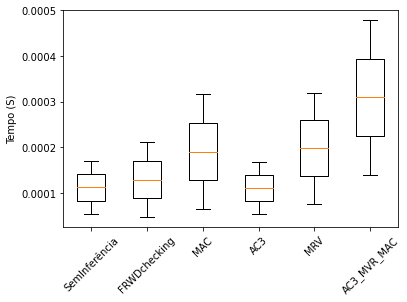

In [109]:
import matplotlib.pyplot as plt

data = []
for label in tempos.keys():
    data.append([tempos[label],desvios[label]])

fig, ax = plt.subplots()
ax.boxplot(data)
ax.set_xticklabels(tempos.keys(), rotation = 45)
ax.set_ylabel("Tempo (S)")

#### Conclusões sobre os resultados temporais
_(todos os valores são referentes a médias)_
Com a tabela acima é possível concluir que:
- o algoritmo que demora menos tempo a encontrar uma solução é a **procura com Retrocesso usando a inferência Forward Checking**, demora apenas 0.000219 segundos;
- usando procura com retrocesso com inferência, verifica-se que **Forward Checking** é mais eficiente que **MAC**;
- a solução do problema utilizando a procura com retrocesso sem inferências nem heurísticas demora menos tempo (0.000337 segundos) que a procura com retrocesso com inferência e heurisrica após pré-processamento com recurso ao algoritmo **AC3** (0.000623 segundos), quase o dobro do tempo;


#### Análise das soluções obtidas

In [114]:
sols = pd.DataFrame(solucoes).T
sols

0           1           2           3         
               0  1  2  3  0  1  2  3  0  1  2  3  0  1  2  3
SemInferência  1  2  3  4  2  1  4  3  3  4  1  2  4  3  2  1
FRWDchecking   1  2  3  4  2  1  4  3  3  4  1  2  4  3  2  1
MAC            1  2  3  4  2  1  4  3  3  4  1  2  4  3  2  1
AC3            1  2  3  4  2  1  4  3  3  4  1  2  4  3  2  1
MRV            3  1  2  4  1  3  4  2  4  2  3  1  2  4  1  3
AC3_MVR_MAC    4  3  1  2  1  2  4  3  3  1  2  4  2  4  3  1

In [111]:
sols.drop_duplicates()

0           1           2           3         
               0  1  2  3  0  1  2  3  0  1  2  3  0  1  2  3
SemInferência  1  2  3  4  2  1  4  3  3  4  1  2  4  3  2  1
MRV            3  1  2  4  1  3  4  2  4  2  3  1  2  4  1  3
AC3_MVR_MAC    4  3  1  2  1  2  4  3  3  1  2  4  2  4  3  1

#### Conclusões sobre os resultados de soluções

Podemos concluir que usando a heurística MRV a solução do problema é diferente quando não a usamos. Mais ainda, verifica-se que mesmo usando a heurística MRV, a solução do problema é diferente quando se fez um pré-processamento com recurso ao algoritmo AC3.



## Visualização do problema

In [19]:
def visualizacao_quadrado_latino(n, problema_csp, solucao):
    """Gera uma visualização do estado inicial e da solução de um problema de quadrados
    latinos de dimensão n
    
    Args:
        n (int): Dimensão do problema
        problema_csp (CSP): Object CSP do problema em questão
        solucao (dict): Solução do problema
    """    
    
    # Construir matriz inicial com os valores do problema
    estado_inicial = [[0 for y in range(n)] for x in range(n)]
    for var, dom in problema_csp.domains.items():
        if len(dom) == 1:
            estado_inicial[var[1]][var[0]] = dom[0]
        
    # Construir matriz final com os valores do problema
    estado_final = [[0 for y in range(n)] for x in range(n)]
    for var, valor in solucao.items():
        estado_final[var[1]][var[0]] = valor
    
    # Construir strings que representam as matrizes
    board_inicial = ""
    board_final = ""
    for y in range(n):
        for x in range(n):
            board_inicial += str(estado_inicial[y][x]) + " "
            board_final += str(estado_final[y][x]) + " "
        board_inicial += "\n"
        board_final += "\n"
    
    print("Estado Inicial:")
    print(board_inicial)
    print("Solução:")
    print(board_final)

Para visualizar o problema anterior basta invocar a função visualizacao_quadrado_latino dando a dimensao, o CSP e a solução como argumentos

In [20]:
visualizacao_quadrado_latino(n, quadrado_latino(n), backtracking_search(quadrado_latino(n)))

Estado Inicial:
0 0 0 0 
0 0 0 0 
0 0 0 0 
0 0 0 0 

Solução:
1 2 3 4 
2 1 4 3 
3 4 1 2 
4 3 2 1 



## Criação do problema Futoshiki *5x5*

Mostrem que o código está a funcionar, construindo um problema de Futoshiki *5x5*, imprimindo as variáveis, domínios iniciais, e vizinhos. Adicione os comentários necessários. Utilize o [link](https://www.futoshiki.org/) para gerar puzzles e validar a implementação.

Para criar um problema Futoshiki vamos ter definir os elementos da matriz que estão preenchidos e estabelecer as relações de desigualdade presentes no problema.

In [21]:
preenchidos5 = {(0,3) : [2], (4,3) : [3]}
desigualdades5 = {((3,0),(4,0)) : maior, ((0,1),(1,1)) : menor, ((0,2),(1,2)) : menor,\
                 ((3,3),(3,2)) : menor, ((1,4),(2,4)) : maior, ((2,4),(2,3)) : maior, \
                 ((4,4),(4,3)) : maior}

Podemos então criar um problema Futoshiki 5x5 da seguinte forma

In [23]:
futoshiki5 = futoshiki(5, preenchidos5, desigualdades5)

E ver as variáveis, domínios e vizinhos

In [24]:
print("Variáveis = ", futoshiki5.variables, "\n")
print("Domínios = ", futoshiki5.domains,"\n")
print("Vizinhos = ", futoshiki5.neighbors, "\n")

Variáveis =  [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (2, 0), (2, 1), (2, 2), (2, 3), (2, 4), (3, 0), (3, 1), (3, 2), (3, 3), (3, 4), (4, 0), (4, 1), (4, 2), (4, 3), (4, 4)] 

Domínios =  {(0, 3): [2], (4, 3): [3], (0, 1): [1, 2, 3, 4, 5], (2, 4): [1, 2, 3, 4, 5], (4, 0): [1, 2, 3, 4, 5], (1, 2): [1, 2, 3, 4, 5], (3, 4): [1, 2, 3, 4, 5], (0, 4): [1, 2, 3, 4, 5], (2, 1): [1, 2, 3, 4, 5], (3, 1): [1, 2, 3, 4, 5], (0, 2): [1, 2, 3, 4, 5], (2, 2): [1, 2, 3, 4, 5], (1, 0): [1, 2, 3, 4, 5], (3, 2): [1, 2, 3, 4, 5], (1, 3): [1, 2, 3, 4, 5], (4, 1): [1, 2, 3, 4, 5], (4, 4): [1, 2, 3, 4, 5], (0, 0): [1, 2, 3, 4, 5], (1, 1): [1, 2, 3, 4, 5], (2, 0): [1, 2, 3, 4, 5], (4, 2): [1, 2, 3, 4, 5], (3, 0): [1, 2, 3, 4, 5], (1, 4): [1, 2, 3, 4, 5], (2, 3): [1, 2, 3, 4, 5], (3, 3): [1, 2, 3, 4, 5]} 

Vizinhos =  {(0, 0): [(0, 1), (0, 2), (0, 3), (0, 4), (1, 0), (2, 0), (3, 0), (4, 0)], (0, 1): [(0, 0), (0, 2), (0, 3), (0, 4), (1, 1), (2, 1), (3, 1), (4, 1)], (0, 2):

Resolva o problema com o backtracking sem inferencia, com inferencia, e com uma heurística. Até que dimensão consegue resolver o problema em menos de 1 minuto?

In [71]:
import timeit

def avg_run_time(func, *args, **kwargs):
    """Corre uma função n vezes medindo o tempo de execução de cada vez
    e imprime a média dos tempos

    Args:
        func: Função a correr
    """
    n = 1000
    run_times = []
    for i in range(n):
        start = timeit.default_timer()
        func(*args, **kwargs)
        stop = timeit.default_timer()
        run_times.append(stop-start)
    return sum(run_times) / n

solucoesFutoshiki = {}
temposFutoshiki = {}

- Backtracking sem inferência

In [72]:
# Definir problema
Futoshiki5SemInferência = futoshiki(5, preenchidos5, desigualdades5)
# Guardar solucao
sol_15 = backtracking_search(Futoshiki5SemInferência)
# Calcular tempo medio executando 20 vezes
tempo_medio15 = avg_run_time(backtracking_search,Futoshiki5SemInferência)
# Guardar resultados
temposFutoshiki['Futoshiki5SemInferência'] = tempo_medio15
solucoesFutoshiki['Futoshiki5SemInferência'] = sol_15
# Imprimir resultados
print(f"Tempo médio de execução: {tempo_medio15}")
print('Assignment (Futoshiki5SemInferência) = ',sol_15)


Tempo médio de execução: 0.0003079482240016205
Assignment (Futoshiki5SemInferência) =  {(0, 0): 5, (0, 1): 3, (0, 2): 1, (0, 3): 2, (0, 4): 4, (1, 0): 1, (1, 1): 4, (1, 2): 2, (1, 3): 5, (1, 4): 3, (2, 0): 4, (2, 1): 5, (2, 2): 3, (2, 3): 1, (2, 4): 2, (3, 0): 3, (3, 1): 2, (3, 2): 5, (3, 3): 4, (3, 4): 1, (4, 0): 2, (4, 1): 1, (4, 2): 4, (4, 3): 3, (4, 4): 5}


- Backtracking com inferência Forward Checking

In [73]:
# Definir problema
Futoshiki5ComInferência_FRWDchecking = futoshiki(5, preenchidos5, desigualdades5)
# Resolver e guardar solucao
sol_25 = backtracking_search(Futoshiki5ComInferência_FRWDchecking, inference=forward_checking)
# Calcular o tempo medio de execucao
tempo_medio25 = avg_run_time(backtracking_search, Futoshiki5ComInferência_FRWDchecking, inference=forward_checking)
# Guardar resultados
tempos['Futoshiki5ComInferência_FRWDchecking'] = tempo_medio25
solucoes['Futoshiki5ComInferência_FRWDchecking'] = sol_25
# Imprimir resultados
print(f"Tempo médio de execução: {tempo_medio25}")
print('Assignment (Futoshiki5ComInferência_FRWDchecking) = ',sol_25)

Tempo médio de execução: 0.00041593393399944035
Assignment (Futoshiki5ComInferência_FRWDchecking) =  {(0, 0): 5, (0, 1): 3, (0, 2): 1, (0, 3): 2, (0, 4): 4, (1, 0): 1, (1, 1): 4, (1, 2): 2, (1, 3): 5, (1, 4): 3, (2, 0): 4, (2, 1): 5, (2, 2): 3, (2, 3): 1, (2, 4): 2, (3, 0): 3, (3, 1): 2, (3, 2): 5, (3, 3): 4, (3, 4): 1, (4, 0): 2, (4, 1): 1, (4, 2): 4, (4, 3): 3, (4, 4): 5}


- Backtracking com inferência Foward-Checking

In [74]:
# Resolver e guardar solucao
sol_35 = backtracking_search(futoshiki5, inference=forward_checking)
# Tempo medio
tempo_medio35 = avg_run_time(backtracking_search, futoshiki5, inference=forward_checking)
# Guardar resultados
tempos['Futoshiki5_FWDCheck'] = tempo_medio35
solucoes['Futoshiki5_FWDCheck'] = sol_35
# Imprimir resultados
print(f"Tempo médio de execução: {tempo_medio35}")
print('Assignment (Futoshiki5_FWDCheck) = ',sol_35)

Tempo médio de execução: 0.00043752727700120886
Assignment (Futoshiki5_FWDCheck) =  {(0, 0): 5, (0, 1): 3, (0, 2): 1, (0, 3): 2, (0, 4): 4, (1, 0): 1, (1, 1): 4, (1, 2): 2, (1, 3): 5, (1, 4): 3, (2, 0): 4, (2, 1): 5, (2, 2): 3, (2, 3): 1, (2, 4): 2, (3, 0): 3, (3, 1): 2, (3, 2): 5, (3, 3): 4, (3, 4): 1, (4, 0): 2, (4, 1): 1, (4, 2): 4, (4, 3): 3, (4, 4): 5}


- Backtracking com inferência MAC

In [75]:
# Resolver e guardar solucao
sol_45 = backtracking_search(futoshiki5, inference=mac)
# Tempo medio
tempo_medio45 = avg_run_time(backtracking_search, futoshiki5, inference=mac)
# Guardar resultados
tempos['Futoshiki5_MAC'] = tempo_medio45
solucoes['Futoshiki5_MAC'] = sol_45
# Imprimir resultados
print(f"Tempo médio de execução: {tempo_medio45}")
print('Assignment (Futoshiki5_MAC) = ',sol_45)

Tempo médio de execução: 0.000631167650999032
Assignment (Futoshiki5_MAC) =  {(0, 0): 5, (0, 1): 3, (0, 2): 1, (0, 3): 2, (0, 4): 4, (1, 0): 1, (1, 1): 4, (1, 2): 2, (1, 3): 5, (1, 4): 3, (2, 0): 4, (2, 1): 5, (2, 2): 3, (2, 3): 1, (2, 4): 2, (3, 0): 3, (3, 1): 2, (3, 2): 5, (3, 3): 4, (3, 4): 1, (4, 0): 2, (4, 1): 1, (4, 2): 4, (4, 3): 3, (4, 4): 5}


- Backtracking com pré-processamento AC3

In [76]:
# Pre Processamento
futo5_AC3 = AC3(futoshiki5)
# Resolver e guardar
sol_55 = backtracking_search(futo5_AC3)
# Tempo medio
tempo_medio55 = avg_run_time(backtracking_search, futo5_AC3)
# Guardar resultados
tempos['Futoshiki5_AC3'] = tempo_medio55
solucoes['Futoshiki5_AC3'] = sol_55
# Imprimir resultados
print(f"Tempo médio de execução: {tempo_medio55}")
print('Assignment (Futoshiki5_AC3) = ',sol_55)

Tempo médio de execução: 0.0003771148859955247
Assignment (Futoshiki5_AC3) =  {(0, 0): 5, (0, 1): 3, (0, 2): 1, (0, 3): 2, (0, 4): 4, (1, 0): 1, (1, 1): 4, (1, 2): 2, (1, 3): 5, (1, 4): 3, (2, 0): 4, (2, 1): 5, (2, 2): 3, (2, 3): 1, (2, 4): 2, (3, 0): 3, (3, 1): 2, (3, 2): 5, (3, 3): 4, (3, 4): 1, (4, 0): 2, (4, 1): 1, (4, 2): 4, (4, 3): 3, (4, 4): 5}


- Backtracking com heurística MRV

In [77]:
# Resolver e guardar
sol_65 = backtracking_search(futoshiki5, select_unassigned_variable=mrv)
# tempo medio
tempo_medio65 = avg_run_time(backtracking_search, futoshiki5, select_unassigned_variable=mrv)
# Guardar resultados
tempos['Futoshiki5_MRV'] = tempo_medio65
solucoes['Futoshiki5_MRV'] = sol_65
# Imprimir resultados
print(f"Tempo médio de execução: {tempo_medio65}")
print('Assignment (Futoshiki5_MRV) = ',sol_65)

Tempo médio de execução: 0.0005977533229963683
Assignment (Futoshiki5_MRV) =  {(2, 4): 2, (1, 1): 4, (2, 0): 4, (1, 3): 5, (1, 0): 1, (4, 4): 5, (1, 2): 2, (0, 2): 1, (2, 2): 3, (3, 3): 4, (2, 3): 1, (3, 2): 5, (2, 1): 5, (0, 3): 2, (0, 4): 4, (4, 1): 1, (3, 0): 3, (0, 1): 3, (4, 0): 2, (4, 3): 3, (0, 0): 5, (3, 4): 1, (3, 1): 2, (1, 4): 3, (4, 2): 4}


- Backtracking com Heurística MRV, Inferência Forward-Checking e pré-processamento AC3

In [78]:
# Pre processamento 
futo5_ac3 = AC3(futoshiki5)
# Resolver e guardar
sol_75 = backtracking_search(futo5_ac3, select_unassigned_variable=mrv, inference=mac)
# tempo medio
tempo_medio75 = avg_run_time(backtracking_search, futo5_ac3, select_unassigned_variable=mrv, inference=mac)
# Guardar resultados
tempos['Futoshiki5HeuristicaInferenciaAC3'] = tempo_medio75
solucoes['Futoshiki5HeuristicaInferenciaAC3'] = sol_75
# Imprimir resultados
print(f"Tempo médio de execução: {tempo_medio65}")
print('Assignment (Futoshiki5HeuristicaInferenciaAC3) = ',sol_75)

Tempo médio de execução: 0.0005977533229963683
Assignment (Futoshiki5HeuristicaInferenciaAC3) =  {(3, 2): 5, (4, 4): 5, (2, 3): 1, (3, 3): 4, (0, 4): 4, (1, 4): 3, (3, 0): 3, (0, 0): 5, (0, 3): 2, (0, 1): 3, (1, 0): 1, (4, 2): 4, (2, 4): 2, (3, 1): 2, (1, 2): 2, (1, 3): 5, (2, 2): 3, (4, 3): 3, (1, 1): 4, (3, 4): 1, (2, 1): 5, (4, 0): 2, (2, 0): 4, (4, 1): 1, (0, 2): 1}


In [ ]:
temposSorted = dict(sorted(temposFutoshiki.items(), key=lambda x:x[1]))
pd.DataFrame(temposSorted, index=['Tempo médio de execução']).T

,Tempo médio de execução
Futoshiki5ComHeuristica,0.001394
Futoshiki5ComInferência_AC3,0.001609
Futoshiki5SemInferência,0.001752
Futoshiki5ComInferência_FRWDchecking,0.001998
Futoshiki5ComInferência_MAC,0.002322
Futoshiki5ComHeuristica_FRWDchecking_AC3,0.002778


In [ ]:
pd.DataFrame(solucoesFutoshiki).T.drop_duplicates()

0              1              ...  3              4  \
                         0  1  2  3  4  0  1  2  3  4  ...  0  1  2  3  4  0   
Futoshiki5SemInferência  5  3  1  2  4  1  4  2  5  3  ...  3  2  5  4  1  2   

                                     
                         1  2  3  4  
Futoshiki5SemInferência  1  4  3  5  

[1 rows x 25 columns]

Para a nossa configuração encontramos que um problema 7x7 de dificuldade extrema do website indicado no enunciado do projeto, tem um tempo de execução por volta de 60 segundos. Portanto conseguimos resolver problemas 6x6 em menos de 1 minuto, e alguns problemas 7x7 mais simples em menos de um minuto.  
<br>
Isto permite-nos concluir que a complexidade das restrições de desigualdade impostas no problema vão afetar bastante o tempo de procura.

In [1]:
preenchidos7ext = {(3,2) : [2], (4,0) : [4]}
desigualdades7ext = {((1,0),(2,0)):menor, ((2,0),(3,0)):menor, ((5,0),(6,0)): maior, ((2,1),(2,0)):menor, ((5,1),(5,0)):menor, ((0,1),(1,1)):maior, ((1,1),(2,1)):maior, ((2,1),(3,1)): menor, ((4,1),(5,1)):menor, ((2,2),(2,1)): menor, ((5,2),(5,1)): maior, ((1,3),(1,2)): menor, ((2,3),(2,2)): maior, ((0,3),(1,3)):maior, ((2,3),(3,3)):menor, ((4,3),(5,3)): menor, ((0,4),(0,3)):maior,((1,4),(1,3)):menor,((6,4),(6,3)):menor, ((3,4),(4,4)):menor,((4,4),(5,4)):menor,((3,6),(3,5)):maior, ((3,5),(3,4)):menor, ((0,6),(0,5)): maior, ((0,2),(1,2)): maior}
futoshiki7Extreme = futoshiki(7, preenchidos7ext, desigualdades7ext)


futo7_ac3 = AC3(futoshiki7Extreme)
start = timeit.default_timer()
sol_futo7ext = backtracking_search(futo7_ac3, inference=forward_checking)
end = timeit.default_timer()
print(f"Tempo de execução: {end-start}")

NameError: name 'menor' is not defined

Futoshiki 8x8

In [4]:
valores_iniciais8 = {(0,2) : [5], (0,4) : [8], (4,4) : [4], (0,6) : [2], (1,6) : [5], 
                     (0,7) : [7], (3,7) : [3]}

desigualdades8 = {((3,0),(4,0)) : maior, ((1,1),(1,0)) : maior, ((3,1),(4,1)) : menor, \
                  ((4,1),(4,0)) : menor, ((5,1),(5,0)) : maior, ((6,1),(7,1)) : menor, \
                  ((0,2),(1,2)) : menor, ((2,2),(2,1)) : menor, ((0,3),(0,2)) : menor, \
                  ((0,3),(1,3)) : maior, ((2,3),(3,3)) : maior, ((3,3),(3,2)) : menor, \
                  ((4,3),(5,3)) : menor, ((6,3),(7,3)) : menor, ((7,3),(7,2)) : menor, \
                  ((3,4),(4,4)) : menor, ((0,6),(0,5)) : maior, ((1,6),(1,5)) : menor, \
                  ((2,6),(3,6)) : maior, ((3,6),(3,5)) : maior, ((4,6),(5,6)) : maior, \
                  ((5,6),(5,5)) : maior, ((6,6),(7,6)) : menor, ((7,6),(7,5)) : menor, \
                  ((1,7),(1,6)) : maior, ((3,7),(4,7)) : maior, ((4,7),(5,7)) : menor, \
                  ((6,7),(7,7)) : menor}

In [15]:
futo8 = futoshiki(8, valores_iniciais8, desigualdades8)
f8_ac3 = AC3(futo8)
start = timeit.default_timer()
solution = backtracking_search(f8_ac3, inference=forward_checking)
end = timeit.default_timer()
print(solution)

visualizacao_futoshiki(8, futo8, desigualdades8, solution)

{(0, 0): 3, (0, 1): 6, (0, 2): 5, (0, 3): 4, (0, 4): 8, (0, 5): 1, (0, 6): 2, (0, 7): 7, (1, 0): 1, (1, 1): 4, (1, 2): 6, (1, 3): 2, (1, 4): 3, (1, 5): 7, (1, 6): 5, (1, 7): 8, (2, 0): 4, (2, 1): 8, (2, 2): 2, (2, 3): 6, (2, 4): 5, (2, 5): 3, (2, 6): 7, (2, 7): 1, (3, 0): 8, (3, 1): 1, (3, 2): 7, (3, 3): 5, (3, 4): 2, (3, 5): 4, (3, 6): 6, (3, 7): 3, (4, 0): 7, (4, 1): 5, (4, 2): 3, (4, 3): 1, (4, 4): 4, (4, 5): 6, (4, 6): 8, (4, 7): 2, (5, 0): 5, (5, 1): 7, (5, 2): 1, (5, 3): 8, (5, 4): 6, (5, 5): 2, (5, 6): 3, (5, 7): 4, (6, 0): 6, (6, 1): 2, (6, 2): 4, (6, 3): 3, (6, 4): 7, (6, 5): 8, (6, 6): 1, (6, 7): 5, (7, 0): 2, (7, 1): 3, (7, 2): 8, (7, 3): 7, (7, 4): 1, (7, 5): 5, (7, 6): 4, (7, 7): 6}
Estado Inicial:
0   0   0   0 > 0   0   0   0
    ∧           ∨   ∧        
0   0   0   0 < 0   0   0 < 0
        ∨                    
5 < 0   0   0   0   0   0   0
∨           ∨               ∨
0 > 0   0 > 0   0 < 0   0 < 0
                             
8   0   0   0 < 4   0   0   0
         

## Visualização do problema

In [12]:
def visualizacao_futoshiki(n, problema_csp, desigualdades, solucao):
    
    def mapeamento_2D_para_1D(x,y):
        return y*(n+(n-1)*3+1) + x

    def escrita_numeros(x,y):
        return mapeamento_2D_para_1D(x*4, y*2)
    
    def escrita_desigualdades_linha(x,y):
        return mapeamento_2D_para_1D(x*4+2, y*2)
    
    def escrita_desigualdades_coluna(x,y):
        return mapeamento_2D_para_1D(x*4, y*2-1)

    def escrever_desigualdade(operacao, direcao):
        if direcao == "x":
            if operacao.__name__ == "maior":
                return '>'
            else:
                return '<'
        else:
            if operacao.__name__ == "maior":
                return u"\u2227" # Carater ∧
            else:
                return u"\u2228" # Carater ∨

    board_inicial = ([" "] * (n+(n-1)*3) + ["\n"]) * (n*2)
    for var, dom in problema_csp.domains.items():
        if len(dom) == 1:
            board_inicial[escrita_numeros(var[0],var[1])] = str(dom[0])
        else:
            board_inicial[escrita_numeros(var[0],var[1])] = "0"
    for var, operacao in desigualdades.items():
        if (var[0][1] == var[1][1]):
            board_inicial[escrita_desigualdades_linha(var[0][0],var[0][1])] = escrever_desigualdade(operacao, "x")
        else:
            board_inicial[escrita_desigualdades_coluna(var[0][0],var[0][1])] = escrever_desigualdade(operacao, "y")
    
    board_final = board_inicial.copy()
    for var, valor in solucao.items():
        board_final[escrita_numeros(var[0],var[1])] = str(valor)
    

    print("Estado Inicial:")
    print(''.join(board_inicial))
    print("Solução:")
    print(''.join(board_final))

Podemos agora visualizar o problema futoshiki 5x5

In [ ]:
visualizacao_futoshiki(5, futoshiki5, desigualdades, backtracking_search(futoshiki5))

Estado Inicial:
0   0   0   0 > 0
                 
0 < 0   0   0   0
                 
0 < 0   0   0   0
            ∨    
2   0   0   0   3
        ∧       ∧
0   0 > 0   0   0
                 

Solução:
5   1   4   3 > 2
                 
3 < 4   5   2   1
                 
1 < 2   3   5   4
            ∨    
2   5   1   4   3
        ∧       ∧
4   3 > 2   1   5
                 



E o problema futoshiki 7x7